# ***Importing Libraries***

In [1]:
#Time series analysis libraries are being used.
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [2]:
#Any warnings that may occur during the analysis are suppressed.
import warnings
warnings.filterwarnings('ignore')

# ***Reading and Inspecting Data***

In [3]:
#The data is being read from an 'a10' CSV file.
a10=pd.read_csv('a10.csv')
#The first few rows of the dataset are being displayed.
a10.head()

,date,value
0,01-07-1991,3.526591
1,01-08-1991,3.180891
2,01-09-1991,3.252221
3,01-10-1991,3.611003
4,01-11-1991,3.565869


In [4]:
#Summary about the DataFrame, including the number of rows, columns, and the data types of each column.
a10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    204 non-null    object 
 1   value   204 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.3+ KB


# ***Preprocessing the Data***

In [5]:
#The 'date' column is converted to datetime type
a10['date']=a10['date'].astype('datetime64')

#The DataFrame is sorted in ascending order based on the 'date' column
a10.sort_values(by='date')

#The 'date' column is set as the index of the DataFrame
a10.set_index('date',inplace=True)

#The first few rows of the modified DataFrame with the updated index are displayed.
a10.head()

,value
date,
1991-01-07,3.526591
1991-01-08,3.180891
1991-01-09,3.252221
1991-01-10,3.611003
1991-01-11,3.565869


# ***Descriptive Statistics and Missing Values***

In [6]:
#Descriptive Statistics of the dataset, such as count, mean, standard deviation, minimum, and maximum values.
a10.describe().T

,count,mean,std,min,25%,50%,75%,max
value,204.0,10.69443,5.956998,2.81452,5.844095,9.319345,14.289964,29.665356


In [7]:
#Missing values in the dataframe are being checked
print(a10.isnull().sum())

value    0
dtype: int64


# ***Data Visualization***

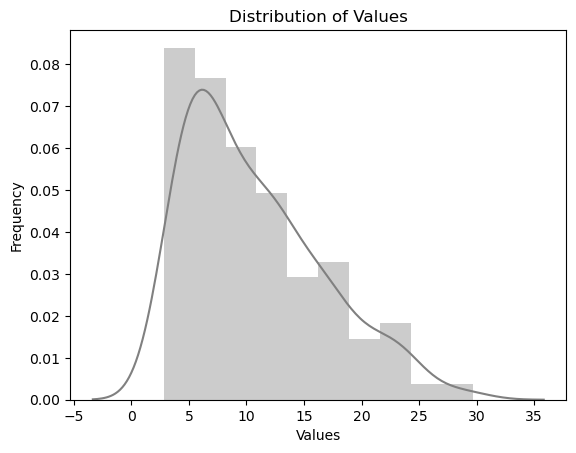

In [8]:
#The distribution of data can be visualized using a distplot, which is a type of plot that combines a histogram with a density plot to show the distribution.
sns.distplot(a10,bins='auto',hist=True,color='gray')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title("Distribution of Values")
plt.show()

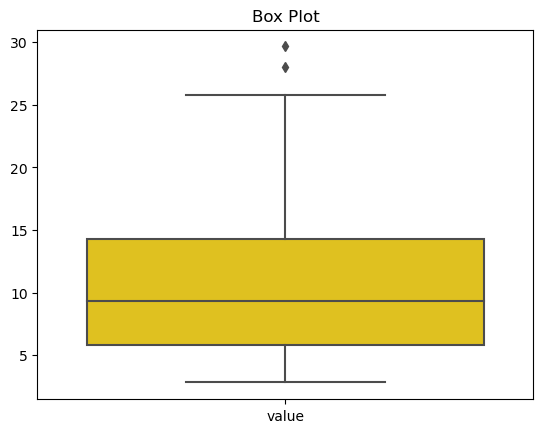

In [9]:
#The data distribution is further visualized using a box plot. This provides information about the median, quartiles, and outliers in the data.
sns.boxplot(data=a10,color='gold')
plt.title("Box Plot")
plt.show()

# ***ETS Decomposition on the Data***

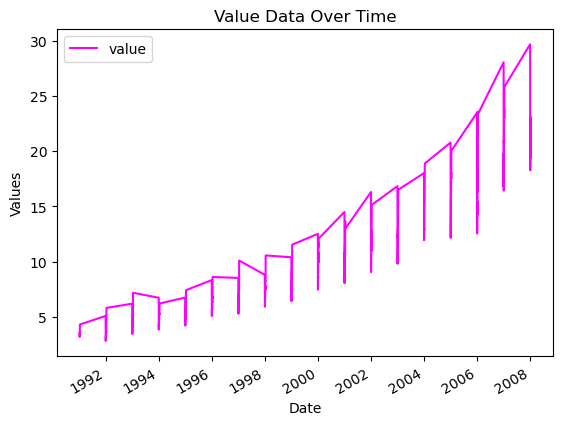

In [10]:
#The plot shows the trend and patterns of the time series.
a10.plot(color='magenta')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title("Value Data Over Time")
plt.show()

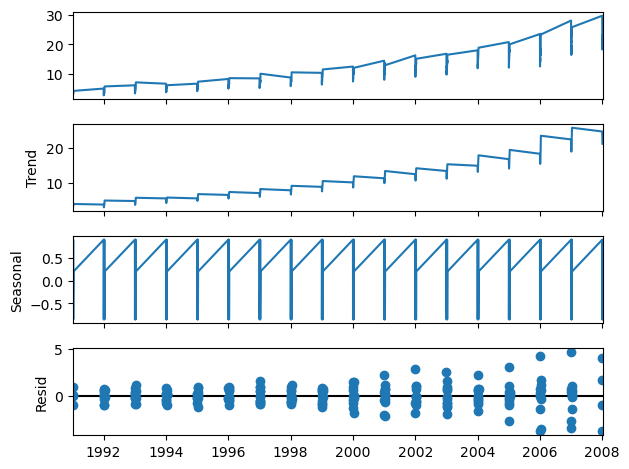

In [11]:
#The plot displays the observed, trend, seasonal, and residual components of the time series.
result=seasonal_decompose(a10,model='Multiplicative',period=4)
result.plot()
plt.show()

# ***Stationarity Check and Differencing for Stationarity***

In [12]:
#The Augmented Dickey-Fuller test is conducted to check the stationarity of the time series.
result=adfuller(a10)

#The p-value is extracted from the result and assigned to the variable 'p_value'.
p_value=result[1]
print('p_value: ',p_value)

p_value:  1.0


In [13]:
#Differencing is applied to make the time series stationary.
a10_diff1=a10.diff().dropna()

#The resulting differenced series is then perform the Augmented Dickey-Fuller test again.
result=adfuller(a10_diff1)

#The p-value after differencing is stored in 'p_value_diff1' and printed.
p_value_diff1=result[1]
print("p_value after differencing: ",p_value_diff1)

p_value after differencing:  0.116653416864684


In [14]:
#Further differencing is applied by taking the difference of df_diff1 to obtain df_diff2.
a10_diff2=a10_diff1.diff().dropna()

#The Augmented Dickey-Fuller test is performed on a10_diff2.
result=adfuller(a10_diff2)

#The p-value is stored in 'p_value_diff2' and printed.
p_value_diff2=result[1]
print("p_value after differencing: ",p_value_diff2)

p_value after differencing:  3.5439163585299536e-18


# ***Order Selection for ARIMA***

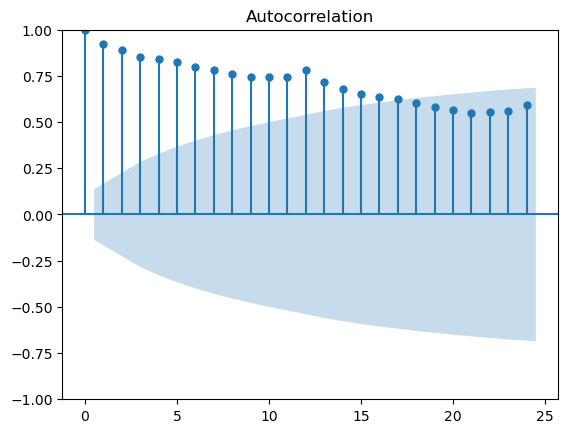

In [15]:
#The ACF represents the correlation between the time series and its lagged values.
#It helps determine the order of the Moving Average (MA) component.
plot_acf(a10)
plt.show()

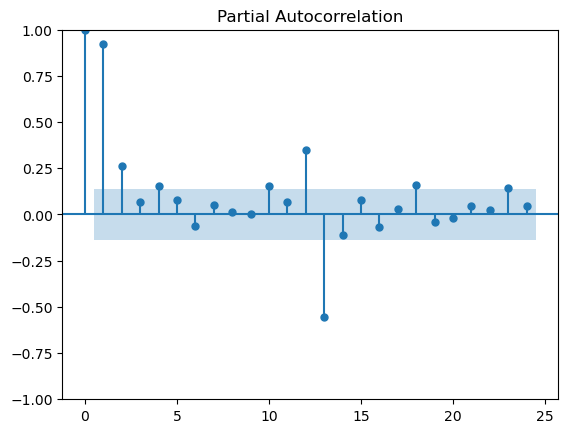

In [16]:
#The PACF represents the correlation between the time series and its lagged values.
#It helps determine the order of the Autoregressive (AR) component.
plot_pacf(a10)
plt.show()

# ***Train-Test Split***

In [17]:
#The code splits the data into training and testing sets using an 80:20 split ratio.
train_size=int(len(a10)*0.8)
print(train_size)

train=a10[:train_size]
test=a10[train_size:]
print("Lenght of test set:",len(test))

163
Lenght of test set: 41


# ***ARIMA Modeling and Forecasting***

In [18]:
#An ARIMA model is fitted to the training data.
model=ARIMA(train,order=(16,2,13)).fit()

#Future values are forecasted using the fitted ARIMA model for the length of the test set.
fc=model.forecast(len(test))

#The forecasted values are printed.
print("Forecast Values:")
print(fc)

Forecast Values:
163    15.321208
164    15.664880
165    15.723998
166    17.509869
167    16.535085
168    18.544482
169    18.353787
170    19.361601
171    19.255618
172    21.124084
173    21.835456
174    23.299342
175    19.060828
176    18.336459
177    18.927240
178    20.562530
179    19.601202
180    21.515399
181    21.563724
182    22.176512
183    22.507717
184    24.004903
185    25.065779
186    26.111144
187    22.327778
188    21.420813
189    22.095169
190    23.451955
191    22.928230
192    24.436781
193    24.672787
194    25.257212
195    25.581738
196    26.994872
197    28.340995
198    28.896007
199    25.633677
200    24.574274
201    25.182576
202    26.481500
203    26.196766
Name: predicted_mean, dtype: float64


In [19]:
#The actual values from the test set are printed.
print("Actual Values:")
print(test)

Actual Values:
                value
date                 
2005-01-02  12.154552
2005-01-03  13.402392
2005-01-04  14.459239
2005-01-05  14.795102
2005-01-06  15.705248
2005-01-07  15.829550
2005-01-08  17.554701
2005-01-09  18.100864
2005-01-10  17.496668
2005-01-11  19.347265
2005-01-12  20.031291
2006-01-01  23.486694
2006-01-02  12.536987
2006-01-03  15.467018
2006-01-04  14.233539
2006-01-05  17.783058
2006-01-06  16.291602
2006-01-07  16.980282
2006-01-08  18.612189
2006-01-09  16.623343
2006-01-10  21.430241
2006-01-11  23.575517
2006-01-12  23.334206
2007-01-01  28.038383
2007-01-02  16.763869
2007-01-03  19.792754
2007-01-04  16.427305
2007-01-05  21.000742
2007-01-06  20.681002
2007-01-07  21.834890
2007-01-08  23.930204
2007-01-09  22.930357
2007-01-10  23.263340
2007-01-11  25.250030
2007-01-12  25.806090
2008-01-01  29.665356
2008-01-02  21.654285
2008-01-03  18.264945
2008-01-04  23.107677
2008-01-05  22.912510
2008-01-06  19.431740


# ***Model Evaluation***

In [20]:
#The mean squared error is calculated between the forecasted values and the actual values.
mse=mean_squared_error(test,fc)
print("Mean Squared Error :",mse)

Mean Squared Error : 10.415566185406147


# ***Visualization of Forecast against Actual Data***

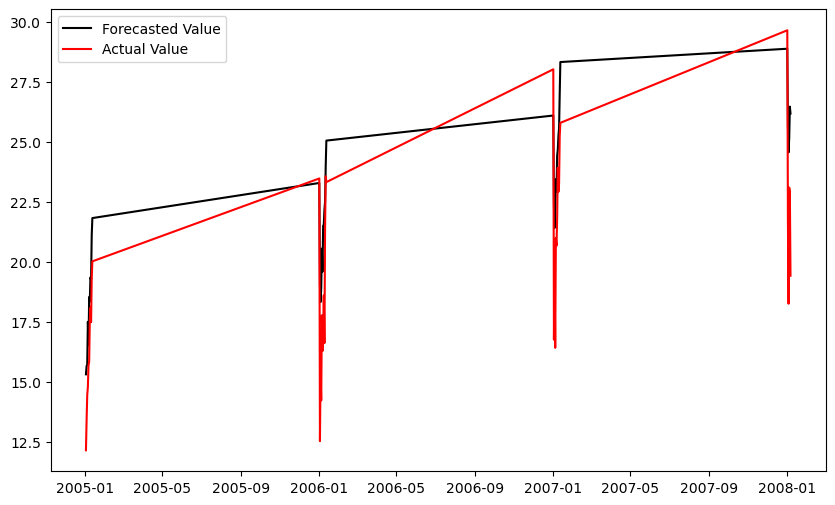

In [21]:
#Reindex the forecasted values to match the date indices of the actual values
fc.index=test.index

#The Forecasted values and Actual values are plotted.
plt.figure(figsize=(10,6))
plt.plot(fc,color='black',label='Forecasted Value')
plt.plot(test,color='red',label='Actual Value')
plt.legend()
plt.show()